In [1]:
cd C:/Users/anshu/Desktop/kaggle/boston_housePrice_Pridiction

C:\Users\anshu\Desktop\kaggle\boston_housePrice_Pridiction


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [3]:
#if you dont have column name in your csv, add names tag and enter column name and put header = None and DONE
data = pd.read_csv("housing.csv", names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT','PRICE'], header = None)
data.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# data.drop(['PRICE'], axis = 1, inplace = True) #without inplace=True it will not give desired output
# data.head()

In [5]:
data.shape #no brackets

(506, 14)

In [6]:
data.columns #no brackets with s in colmun

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [7]:
data.dtypes #with a s

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [8]:
data.nunique() #identify unique number of values in column

CRIM       452
ZN          27
INDUS       77
CHAS        16
NOX        132
RM         437
AGE        399
DIS        361
RAD         10
TAX         67
PTRATIO     85
B          374
LSTAT      445
PRICE      210
dtype: int64

In [9]:
data.isnull().sum() #brackets in both

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE      54
dtype: int64

In [10]:
data = data.dropna()

In [11]:
#see rows with missing values
data[data.isnull().any(axis=1)].head() #prices has 54 null value and we need to impute the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [13]:
#find out correlation between the features
corr = data.corr()
corr.shape

(14, 14)

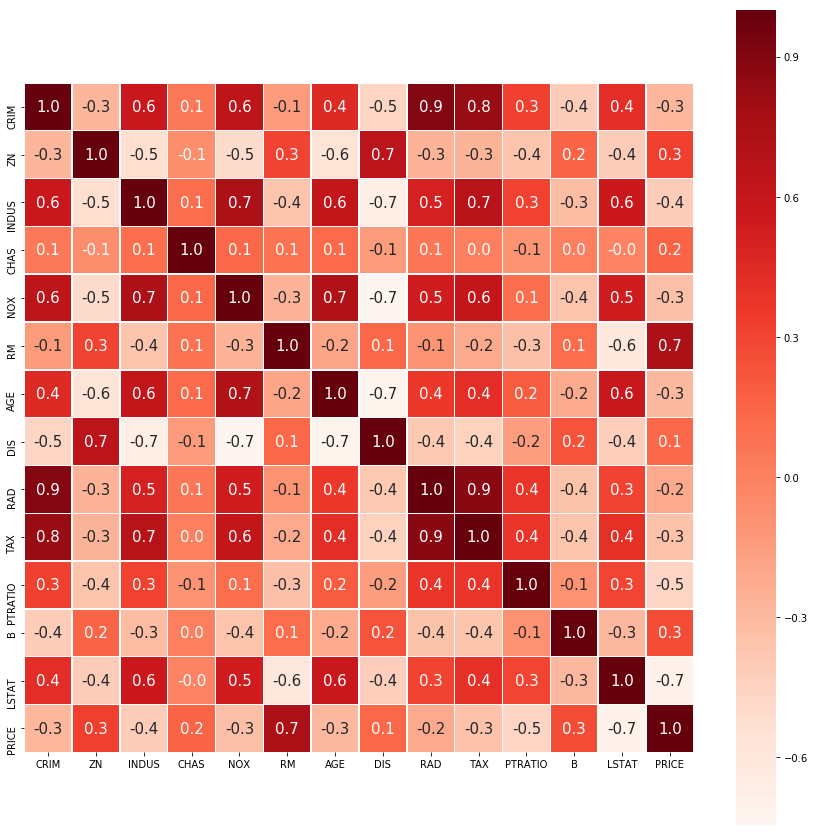

In [14]:
# visualizing correlation on a heat map
plt.figure(figsize=(15,15)) #decides the size of the image
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds', linewidth = 0.5)

In [15]:
#splitting target variable and independent variable
X = data.drop(['PRICE'], axis = 1)
Y = data['PRICE']

In [16]:
#splitting them to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)

## LINEAR REGRESSION


#### training the model

In [17]:
#importing library
from sklearn.linear_model import LinearRegression

#creating linear regressor
lr = LinearRegression()

#train the model using training set
lr.fit(X_train, Y_train) #drop nan otherwise throw error

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lr.intercept_ #value of y intercept

21.550127507326124

#### Model Evaluation

In [19]:
y_pred = lr.predict(X_train)

In [20]:
#Evaluating model
print('R^2: ', metrics.r2_score(Y_train,y_pred))
# print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE: ', metrics.mean_absolute_error(Y_train,y_pred))
print('MSE: ', metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train,y_pred)))

R^2:  0.7403225970999185
MAE:  2.86611343196035
MSE:  18.24409071946878
RMSE: 4.271310187690514


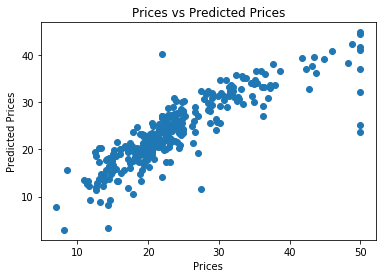

In [21]:
#visualizing the actual price and the predicted prices

plt.scatter(Y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

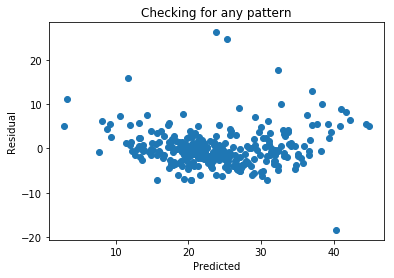

In [22]:
#Checking residual plot
plt.scatter(y_pred, Y_train-y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Checking for any pattern")
plt.show()

#There is no pattern visible in this plot and values are distributed equally around zero. 
#So Linearity assumption is satisfied

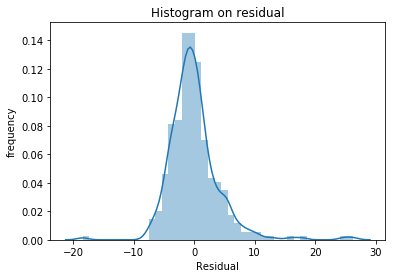

In [23]:
sns.distplot(Y_train-y_pred)
plt.title("Histogram on residual")
plt.xlabel("Residual")
plt.ylabel("frequency")
plt.show()

#Here the residuals are normally distributed. So normality assumption is satisfied

#### predicting test data

In [24]:
y_test_pred = lr.predict(X_test)

In [25]:
#model evaluation
acc_linreg = metrics.r2_score(Y_test, y_test_pred)
print("R^2: ", acc_linreg)
print("MAE: ", metrics.mean_absolute_error(Y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(Y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

#Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

R^2:  0.732036504130758
MAE:  3.4301016596809273
MSE:  25.180362809153582
RMSE:  5.018003866992689


## RANDOM FOREST REGRESSOR

#### Train the model 

In [26]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X_train, Y_train)

C:\Users\anshu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Model predcition on train Data

In [27]:
y_pred = reg.predict(X_train)

#### Model Evaluation

In [28]:
print("R^2: ", metrics.r2_score(Y_train, y_pred))
print("MAE: ", metrics.mean_absolute_error(Y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(Y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2:  0.9512933335585091
MAE:  1.0096835443037977
MSE:  3.4219721518987334
RMSE:  1.8498573328499508


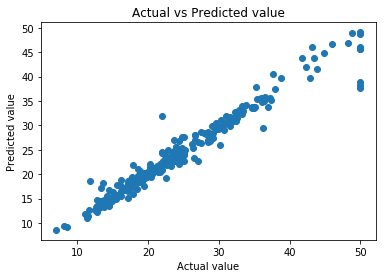

In [29]:
#Visualizing the differences between actual prices and the predicted prices
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted value")
plt.show()

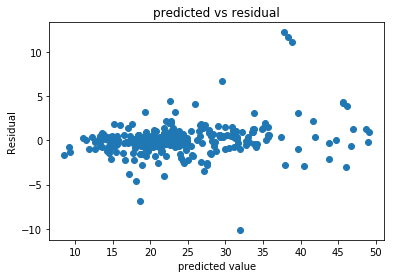

In [30]:
#Checking on the residual
plt.scatter(y_pred, Y_train-y_pred)
plt.xlabel("predicted value")
plt.ylabel("Residual")
plt.title("predicted vs residual")
plt.show()

#### predicting the test data

In [31]:
y_test_pred = reg.predict(X_test)

#### Model Evaluation

In [32]:
acc_random = metrics.r2_score(Y_test, y_test_pred)
print("R^2 : ", acc_random)
print("MAE: ", metrics.mean_absolute_error(Y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(Y_test, y_test_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2 :  0.8615991865862214
MAE:  2.4008823529411765
MSE:  13.005438235294116
RMSE :  3.6063053441568305


## XGBoost Regressor

In [33]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, Y_train)

[23:07:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anshu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

#### max_depth (int) – Maximum tree depth for base learners.

#### learning_rate (float) – Boosting learning rate (xgb’s “eta”)

#### n_estimators (int) – Number of boosted trees to fit.

#### gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

#### min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.

#### subsample (float) – Subsample ratio of the training instance.

#### colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

#### objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

#### nthread (int) – Number of parallel threads used to run xgboost. (Deprecated, please use n_jobs)

#### scale_pos_weight (float) – Balancing of positive and negative weights.

## Model Evaluator

In [34]:
y_pred = xgb.predict(X_train)

#### Model Evaluation

In [35]:
print('R^2:',metrics.r2_score(Y_train, y_pred))
#print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2: 0.9748394089729945
MAE: 1.0260493260395678
MSE: 1.7677013868964468
RMSE: 1.3295493172110793


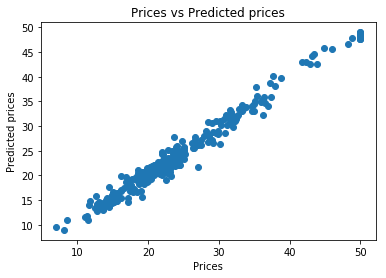

In [36]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

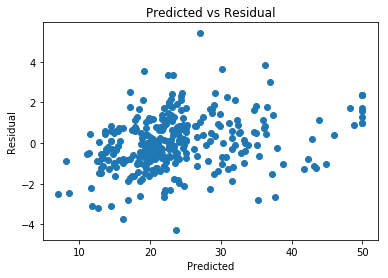

In [37]:
#residual
plt.scatter(Y_train, Y_train-y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Predicted vs Residual")
plt.show()

#### Predicting test data

In [38]:
y_test_pred = reg.predict(X_test)

In [39]:
acc_xgb = metrics.r2_score(Y_test, y_test_pred)
print('R^2:',acc_xgb)
#print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2: 0.8615991865862214
MAE: 2.4008823529411765
MSE: 13.005438235294116
RMSE: 3.6063053441568305


## SVM Regressor

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\anshu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anshu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\anshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### train the model

In [41]:
from sklearn import svm

svm_reg = svm.SVR()

In [42]:
svm_reg.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

#### C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

#### kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

#### degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

#### gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

#### coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

#### shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

### Model Evaluation

In [43]:
y_pred = svm_reg.predict(X_train)

In [44]:
print('R^2:',metrics.r2_score(Y_train, y_pred))
#print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2: 0.6510940793642486
MAE: 2.841175439488562
MSE: 24.512996500845805
RMSE: 4.951060139085952


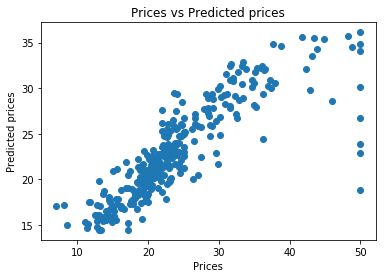

In [45]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

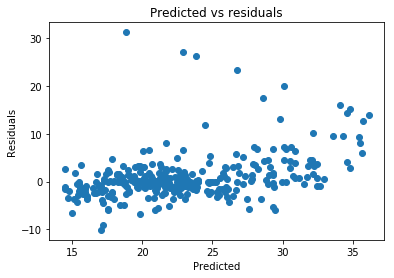

In [46]:
plt.scatter(y_pred,Y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### for Test data set

In [47]:
y_test_pred = svm_reg.predict(X_test)

#### Model Evaluate

In [48]:
acc_svm = metrics.r2_score(Y_test, y_test_pred)
print('R^2:', acc_svm)
#print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2: 0.5425335609760945
MAE: 3.7719750353519044
MSE: 42.98783634788254
RMSE: 6.556510988924105


## Evaluation and Comparison of all the models

In [49]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_random*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,86.159919
2,XGBoost,86.159919
0,Linear Regression,73.203650
3,Support Vector Machines,54.253356


In [50]:
# Since R-square is best for Random Forest, according to me we should go for Random Forest 
# to predcit the house price in Boston.